In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

In [47]:
url = "https://api.finmindtrade.com/api/v4/login"
account = {
    "user_id": "F74086250",
    "password": "Aeiou95048",
}
token = requests.post(url, data=account).json()['token']

url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockPrice",
    "data_id": "2330",
    "start_date": "2016-06-04",
    "end_date": "2021-06-03",
    "token":token
}
data = pd.DataFrame(requests.get(url, params=parameter).json()["data"])
data['average'] = data["Trading_money"]/data["Trading_Volume"]
data

,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover,average
0,2016-06-04,2330,2631269,420392883,160.0,160.0,159.5,160.0,-0.5,1428,159.768113
1,2016-06-06,2330,28898951,4651663660,161.0,162.0,160.0,161.0,1.0,8667,160.963063
2,2016-06-07,2330,47573770,7726094806,161.5,163.5,161.0,162.0,1.0,12269,162.402408
3,2016-06-08,2330,45587946,7522713617,164.0,166.0,163.5,165.5,3.5,15173,165.015410
4,2016-06-13,2330,54689228,8843806836,161.0,162.5,161.0,162.0,-3.5,14466,161.710215
...,...,...,...,...,...,...,...,...,...,...,...
1217,2021-05-28,2330,30720737,18082265480,587.0,592.0,582.0,590.0,8.0,31581,588.601292
1218,2021-05-31,2330,31557426,18751716595,595.0,597.0,590.0,597.0,7.0,29798,594.209318
1219,2021-06-01,2330,18405285,10985893229,598.0,599.0,595.0,598.0,1.0,20318,596.887972
1220,2021-06-02,2330,22416789,13362065937,600.0,600.0,593.0,595.0,-3.0,25170,596.074038


In [48]:
#取得個股的融資卷增減量(張) (data2)
parameter = {
    "dataset": "TaiwanStockMarginPurchaseShortSale",
    "data_id": "2330",
    "start_date": "2016-06-04",
    "token":token, # 參考登入，獲取金鑰
}
data2 = requests.get(url, params=parameter).json()
data2 = pd.DataFrame(data2['data'])
data2=data2[["MarginPurchaseTodayBalance","MarginPurchaseYesterdayBalance","ShortSaleTodayBalance","ShortSaleYesterdayBalance"]]
data2["MarginPurchaseVariation"]=data2["MarginPurchaseTodayBalance"]-data2["MarginPurchaseYesterdayBalance"]
data2["ShortSaleVariation"]=data2["ShortSaleTodayBalance"]-data2["ShortSaleYesterdayBalance"]
data2

data2=data2.drop(1222,axis=0)
data2

,MarginPurchaseTodayBalance,MarginPurchaseYesterdayBalance,ShortSaleTodayBalance,ShortSaleYesterdayBalance,MarginPurchaseVariation,ShortSaleVariation
0,12041,12067,3739,3812,-26,-73
1,11781,12041,3774,3739,-260,35
2,11608,11781,4261,3774,-173,487
3,11172,11608,4323,4261,-436,62
4,11216,11172,3277,4323,44,-1046
...,...,...,...,...,...,...
1217,31552,31434,427,425,118,2
1218,30585,31552,384,427,-967,-43
1219,30208,30585,377,384,-377,-7
1220,30242,30208,365,377,34,-12


In [49]:
#取得個股的股利,本益比,淨值比(data3)
parameter = {
    "dataset": "TaiwanStockPER",
    "data_id": "2330",
    "start_date": "2016-06-04",
    "token":token, # 參考登入，獲取金鑰
}
data3 = requests.get(url, params=parameter).json()
data3 = pd.DataFrame(data3['data'])
data3=data3.drop(["date","stock_id"],axis=1)

data3=data3.drop(1222,axis=0)
data3

,dividend_yield,PER,PBR
0,3.75,14.20,3.24
1,3.73,14.29,3.26
2,3.70,14.37,3.28
3,3.63,14.69,3.35
4,3.70,14.37,3.28
...,...,...,...
1217,1.69,28.30,7.89
1218,1.68,28.63,7.98
1219,1.67,28.68,8.00
1220,1.68,28.54,7.96


In [8]:
#取得大盤的融資餘額(百萬)以及融卷張數 (data4)
parameter = {
    "dataset": "TaiwanStockTotalMarginPurchaseShortSale",
    "start_date": "2016-06-04",
    "token":token, # 參考登入，獲取金鑰
}
data4 = requests.get(url, params=parameter).json()
data4 = pd.DataFrame(data4['data'])[["TodayBalance","name"]]
data4=data4[~data4['name'].isin(["MarginPurchase"])]
MarginPurchaseMoney=data4[data4["name"]=="MarginPurchaseMoney"].drop(columns="name")
MarginPurchaseMoney.rename(columns={"TodayBalance":"MarginPurchaseMoney"})
MarginPurchaseMoney=MarginPurchaseMoney["TodayBalance"]/10000000
MarginPurchaseMoney=MarginPurchaseMoney.to_frame().rename(columns={"TodayBalance":"MarginPurchaseMoney"})
ShortSale=data4[data4["name"]=="ShortSale"].drop(columns="name")
ShortSale=ShortSale.rename(columns={"TodayBalance":"Shortsale"})
mod=list(range(len(data)))
MarginPurchaseMoney=MarginPurchaseMoney.set_axis(mod)
ShortSale=ShortSale.set_axis(mod)
data4=MarginPurchaseMoney.join(ShortSale)
data4

data4=data4.drop(1222,axis=0)
data4

,MarginPurchaseMoney,Shortsale
0,12994.9943,360288
1,12967.5393,368731
2,12935.2080,379136
3,12945.7301,378743
4,12925.4617,355334
...,...,...
1217,23336.5365,556327
1218,23404.7805,551036
1219,24012.6099,563095
1220,24049.8196,550856


In [50]:
data5 = pd.read_csv('TAIEX(1).csv')
data5=data5.iloc[::-1]
mod=list(range(len(data)))
data5=data5.set_axis(mod).drop(["Date","Return",'Percent'],axis=1)
data5.columns = ['大盤指數','漲跌點數']
data5

,大盤指數,漲跌點數
0,8591.57,4.21
1,8597.11,5.54
2,8679.90,82.79
3,8715.48,35.58
4,8536.22,-179.26
...,...,...
1217,16870.86,269.25
1218,17068.43,197.57
1219,17162.38,93.95
1220,17165.04,2.66


In [51]:
#將多張dataframe合併
data=data.join(data2)
data=data.join(data3)
data=data.join(data4)
data=data.join(data5)
data

,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover,...,ShortSaleYesterdayBalance,MarginPurchaseVariation,ShortSaleVariation,dividend_yield,PER,PBR,MarginPurchaseMoney,Shortsale,大盤指數,漲跌點數
0,2016-06-04,2330,2631269,420392883,160.0,160.0,159.5,160.0,-0.5,1428,...,3812,-26,-73,3.75,14.20,3.24,12994.9943,360288,8591.57,4.21
1,2016-06-06,2330,28898951,4651663660,161.0,162.0,160.0,161.0,1.0,8667,...,3739,-260,35,3.73,14.29,3.26,12967.5393,368731,8597.11,5.54
2,2016-06-07,2330,47573770,7726094806,161.5,163.5,161.0,162.0,1.0,12269,...,3774,-173,487,3.70,14.37,3.28,12935.2080,379136,8679.90,82.79
3,2016-06-08,2330,45587946,7522713617,164.0,166.0,163.5,165.5,3.5,15173,...,4261,-436,62,3.63,14.69,3.35,12945.7301,378743,8715.48,35.58
4,2016-06-13,2330,54689228,8843806836,161.0,162.5,161.0,162.0,-3.5,14466,...,4323,44,-1046,3.70,14.37,3.28,12925.4617,355334,8536.22,-179.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,2021-05-28,2330,30720737,18082265480,587.0,592.0,582.0,590.0,8.0,31581,...,425,118,2,1.69,28.30,7.89,23336.5365,556327,16870.86,269.25
1218,2021-05-31,2330,31557426,18751716595,595.0,597.0,590.0,597.0,7.0,29798,...,427,-967,-43,1.68,28.63,7.98,23404.7805,551036,17068.43,197.57
1219,2021-06-01,2330,18405285,10985893229,598.0,599.0,595.0,598.0,1.0,20318,...,384,-377,-7,1.67,28.68,8.00,24012.6099,563095,17162.38,93.95
1220,2021-06-02,2330,22416789,13362065937,600.0,600.0,593.0,595.0,-3.0,25170,...,377,34,-12,1.68,28.54,7.96,24049.8196,550856,17165.04,2.66


In [61]:
test = data[data.日期>'2020-06-04']
train = data[data.日期<='2021-06-04']

In [62]:
data.columns=["日期","股票編號","當日成交量","當日成交金額","開盤價","最高價","最低價","收盤價","買賣價差","周轉率",'平均成交價',"當日融資","昨日融資","當日融卷","昨日融卷","融資變化","融券變化","殖利率","本益比","股價淨值比","大盤融資餘額(百萬)","大盤融卷量","大盤指數","大盤漲跌"]

In [63]:
for column in data:
    print(column)
data

日期
股票編號
當日成交量
當日成交金額
開盤價
最高價
最低價
收盤價
買賣價差
周轉率
平均成交價
當日融資
昨日融資
當日融卷
昨日融卷
融資變化
融券變化
殖利率
本益比
股價淨值比
大盤融資餘額(百萬)
大盤融卷量
大盤指數
大盤漲跌


,日期,股票編號,當日成交量,當日成交金額,開盤價,最高價,最低價,收盤價,買賣價差,周轉率,...,昨日融卷,融資變化,融券變化,殖利率,本益比,股價淨值比,大盤融資餘額(百萬),大盤融卷量,大盤指數,大盤漲跌
0,2016-06-04,2330,2631269,420392883,160.0,160.0,159.5,160.0,-0.5,1428,...,3812,-26,-73,3.75,14.20,3.24,12994.9943,360288,8591.57,4.21
1,2016-06-06,2330,28898951,4651663660,161.0,162.0,160.0,161.0,1.0,8667,...,3739,-260,35,3.73,14.29,3.26,12967.5393,368731,8597.11,5.54
2,2016-06-07,2330,47573770,7726094806,161.5,163.5,161.0,162.0,1.0,12269,...,3774,-173,487,3.70,14.37,3.28,12935.2080,379136,8679.90,82.79
3,2016-06-08,2330,45587946,7522713617,164.0,166.0,163.5,165.5,3.5,15173,...,4261,-436,62,3.63,14.69,3.35,12945.7301,378743,8715.48,35.58
4,2016-06-13,2330,54689228,8843806836,161.0,162.5,161.0,162.0,-3.5,14466,...,4323,44,-1046,3.70,14.37,3.28,12925.4617,355334,8536.22,-179.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,2021-05-28,2330,30720737,18082265480,587.0,592.0,582.0,590.0,8.0,31581,...,425,118,2,1.69,28.30,7.89,23336.5365,556327,16870.86,269.25
1218,2021-05-31,2330,31557426,18751716595,595.0,597.0,590.0,597.0,7.0,29798,...,427,-967,-43,1.68,28.63,7.98,23404.7805,551036,17068.43,197.57
1219,2021-06-01,2330,18405285,10985893229,598.0,599.0,595.0,598.0,1.0,20318,...,384,-377,-7,1.67,28.68,8.00,24012.6099,563095,17162.38,93.95
1220,2021-06-02,2330,22416789,13362065937,600.0,600.0,593.0,595.0,-3.0,25170,...,377,34,-12,1.68,28.54,7.96,24049.8196,550856,17165.04,2.66


<ipython-input-64-ef47dcf5ec4c>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)
c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\f74086250\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0.

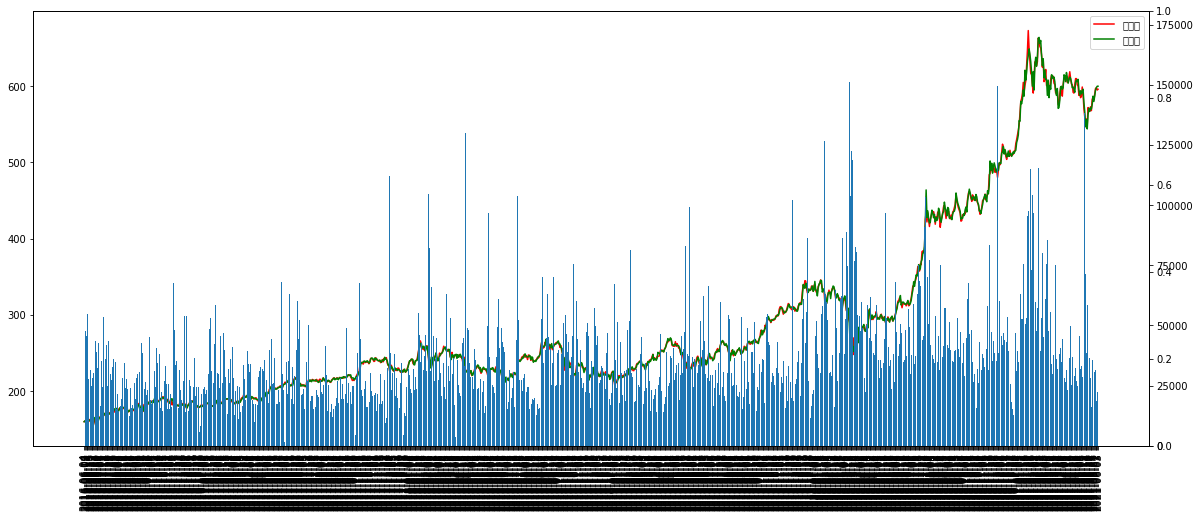

In [64]:
fig=plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)  
ax1 = fig.add_subplot(111)
ax1.plot(data.收盤價,color='red',label='收盤價')
ax1.plot(data.開盤價,color='green',label='開盤價')
plt.legend()
# twin 為共享x軸
ax2= ax1.twinx()
plt.bar(data.日期,data.當日成交量.astype('int')//1000)
ax3 = ax1.twinx()
plt.savefig('2330_year.png')

In [65]:
df=data
df

,日期,股票編號,當日成交量,當日成交金額,開盤價,最高價,最低價,收盤價,買賣價差,周轉率,...,昨日融卷,融資變化,融券變化,殖利率,本益比,股價淨值比,大盤融資餘額(百萬),大盤融卷量,大盤指數,大盤漲跌
0,2016-06-04,2330,2631269,420392883,160.0,160.0,159.5,160.0,-0.5,1428,...,3812,-26,-73,3.75,14.20,3.24,12994.9943,360288,8591.57,4.21
1,2016-06-06,2330,28898951,4651663660,161.0,162.0,160.0,161.0,1.0,8667,...,3739,-260,35,3.73,14.29,3.26,12967.5393,368731,8597.11,5.54
2,2016-06-07,2330,47573770,7726094806,161.5,163.5,161.0,162.0,1.0,12269,...,3774,-173,487,3.70,14.37,3.28,12935.2080,379136,8679.90,82.79
3,2016-06-08,2330,45587946,7522713617,164.0,166.0,163.5,165.5,3.5,15173,...,4261,-436,62,3.63,14.69,3.35,12945.7301,378743,8715.48,35.58
4,2016-06-13,2330,54689228,8843806836,161.0,162.5,161.0,162.0,-3.5,14466,...,4323,44,-1046,3.70,14.37,3.28,12925.4617,355334,8536.22,-179.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,2021-05-28,2330,30720737,18082265480,587.0,592.0,582.0,590.0,8.0,31581,...,425,118,2,1.69,28.30,7.89,23336.5365,556327,16870.86,269.25
1218,2021-05-31,2330,31557426,18751716595,595.0,597.0,590.0,597.0,7.0,29798,...,427,-967,-43,1.68,28.63,7.98,23404.7805,551036,17068.43,197.57
1219,2021-06-01,2330,18405285,10985893229,598.0,599.0,595.0,598.0,1.0,20318,...,384,-377,-7,1.67,28.68,8.00,24012.6099,563095,17162.38,93.95
1220,2021-06-02,2330,22416789,13362065937,600.0,600.0,593.0,595.0,-3.0,25170,...,377,34,-12,1.68,28.54,7.96,24049.8196,550856,17165.04,2.66


In [66]:
df.columns=["日期","股票編號","當日成交量","當日成交金額","開盤價","最高價","最低價","收盤價","買賣價差","周轉率",'平均成交價',"當日融資","昨日融資","當日融卷","昨日融卷","融卷變化","融資變化","殖利率","本益比","股價淨值比","大盤融資餘額(百萬)","大盤融卷量","大盤指數","大盤漲跌"]
df=df.drop("股票編號",axis=1)
df.set_index(["日期"], inplace=True)
df.insert(loc=0,column="price",value=df["收盤價"].tolist())
df=df.drop("收盤價",axis=1)

In [67]:
for column in df:
    print(column,":",end="")
    print(df[column].rolling(10).corr(df['price']).mean(),"& ",end="")
    print(df[column].rolling(20).corr(df['price']).mean(),"& ",end="")
    print(df[column].rolling(30).corr(df['price']).mean(),"& ",end="")
    print(df[column].rolling(50).corr(df['price']).mean())

price :1.0000000000009488 & 1.0000000000005163 & 0.999999999999705 & 1.0000000000002032
當日成交量 :-0.060926112156154684 & -0.05296856382912049 & -0.05544127975642681 & -0.04084434167185033
當日成交金額 :-0.023481383742197468 & -0.0034604126050957534 & 0.004525258374345535 & 0.04058623762819695
開盤價 :0.7734322229160839 & 0.8761190336873248 & 0.9156180808073966 & 0.9507631112995036
最高價 :0.897879147235532 & 0.9470361082897873 & 0.9641822082122997 & 0.9788268477013771
最低價 :0.9072244607151286 & 0.9512475508678778 & 0.9666060376034861 & 0.9800555556959423
買賣價差 :0.4481587280886025 & 0.3388784759028325 & 0.28144584272453527 & 0.21574714804626507
周轉率 :-0.049475140709937 & -0.03937077724579707 & -0.03761868327797625 & -0.014568058668363274
平均成交價 :0.9516157832970108 & 0.9747048528102245 & 0.9825495316338504 & 0.9895924037662988
當日融資 :-0.6108921637783956 & -0.5553553371507433 & -0.5104394506348009 & -0.4440866989736907
昨日融資 :-0.33014910292490435 & -0.40943110762830154 & -0.419215521125947 & -0.3999626081316

In [82]:
df_new=df.drop(['平均成交價',"當日成交量","當日成交金額","周轉率","當日融卷","昨日融卷","當日融資","昨日融資","殖利率"],axis=1)
df_new

,price,開盤價,最高價,最低價,買賣價差,融卷變化,融資變化,本益比,股價淨值比,大盤融資餘額(百萬),大盤融卷量,大盤指數,大盤漲跌
日期,,,,,,,,,,,,,
2016-06-04,160.0,160.0,160.0,159.5,-0.5,-26,-73,14.20,3.24,12994.9943,360288,8591.57,4.21
2016-06-06,161.0,161.0,162.0,160.0,1.0,-260,35,14.29,3.26,12967.5393,368731,8597.11,5.54
2016-06-07,162.0,161.5,163.5,161.0,1.0,-173,487,14.37,3.28,12935.2080,379136,8679.90,82.79
2016-06-08,165.5,164.0,166.0,163.5,3.5,-436,62,14.69,3.35,12945.7301,378743,8715.48,35.58
2016-06-13,162.0,161.0,162.5,161.0,-3.5,44,-1046,14.37,3.28,12925.4617,355334,8536.22,-179.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28,590.0,587.0,592.0,582.0,8.0,118,2,28.30,7.89,23336.5365,556327,16870.86,269.25
2021-05-31,597.0,595.0,597.0,590.0,7.0,-967,-43,28.63,7.98,23404.7805,551036,17068.43,197.57
2021-06-01,598.0,598.0,599.0,595.0,1.0,-377,-7,28.68,8.00,24012.6099,563095,17162.38,93.95


In [83]:
df_one=df_new['price']
df_one=pd.DataFrame(df_one)
df_one=df_new['開盤價']
df_one=pd.DataFrame(df_one)
df_one

KeyError: ('price', '開盤價')

In [70]:
from sklearn.preprocessing import MinMaxScaler 
values = df_one.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
print(scaled)
scaled.shape[0]

[[0.00869565]
 [0.01062802]
 [0.01256039]
 ...
 [0.85507246]
 [0.84927536]
 [0.85120773]]


1222

In [71]:
print(scaled)

[[0.00869565]
 [0.01062802]
 [0.01256039]
 ...
 [0.85507246]
 [0.84927536]
 [0.85120773]]


In [72]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [73]:
reframed = series_to_supervised(scaled, 10, 1)
reframed

,var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
10,0.008696,0.010628,0.012560,0.019324,0.012560,0.012560,0.014493,0.009662,0.014493,0.014493,0.019324
11,0.010628,0.012560,0.019324,0.012560,0.012560,0.014493,0.009662,0.014493,0.014493,0.019324,0.020290
12,0.012560,0.019324,0.012560,0.012560,0.014493,0.009662,0.014493,0.014493,0.019324,0.020290,0.016425
13,0.019324,0.012560,0.012560,0.014493,0.009662,0.014493,0.014493,0.019324,0.020290,0.016425,0.006763
14,0.012560,0.012560,0.014493,0.009662,0.014493,0.014493,0.019324,0.020290,0.016425,0.006763,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1217,0.775845,0.760386,0.804831,0.795169,0.795169,0.806763,0.797101,0.826087,0.829952,0.824155,0.839614
1218,0.760386,0.804831,0.795169,0.795169,0.806763,0.797101,0.826087,0.829952,0.824155,0.839614,0.853140
1219,0.804831,0.795169,0.795169,0.806763,0.797101,0.826087,0.829952,0.824155,0.839614,0.853140,0.855072
1220,0.795169,0.795169,0.806763,0.797101,0.826087,0.829952,0.824155,0.839614,0.853140,0.855072,0.849275


In [74]:
df_one.shape[1]

1

In [80]:
n_days=10
n_features = df_one.shape[1]
print(n_features)
n_obs = n_days * n_features
print(n_obs)
train_X, train_y = train[:,0:n_obs], train[:,-n_features]
test_X, test_y = test[:,0:n_obs], test[:,-n_features]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

1
10


TypeError: '(slice(None, None, None), slice(0, 10, None))' is an invalid key